<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/machine-learning-bootcamp/unsupervised/02_dimensionality_reduction/03_pca_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Załadowanie danych](#1)
3. [Podział na zbiór treningowy i testowy](#2)
4. [Standaryzacja](#3)
5. [PCA](#4)




### <a name='0'></a> Import bibliotek

In [36]:
print("############################################################")
print("Etap9. Odcinek: PCA - Analiza Głównych Składowych - Wine dataset")

# Główne składowe są liniowymi kombinacjami zmiennych w zbiorze oryginalnym

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

np.set_printoptions(precision=4, suppress=True, edgeitems=5, linewidth=200)

############################################################
Etap9. Odcinek: PCA - Analiza Głównych Składowych - Wine dataset


### <a name='1'></a> Załadowanie danych

In [37]:
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df = df_raw.copy()
df.head()
# pierwsza zmienna jest targetem

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [38]:
data = df.iloc[:, 1:]
target = df.iloc[:, 0]
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
target.value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

### <a name='2'></a> Podział na zbiór treningowy i testowy

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (133, 13)
X_test shape: (45, 13)


### <a name='3'></a> Standaryzacja

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std[:5]

array([[-0.4582, -0.848 , -1.6059, -0.2691, -0.7574, -1.4214, -0.7403, -0.5762, -0.4414, -1.0758,  0.3257,  0.1555, -0.5838],
       [ 0.7765, -0.4388,  1.1806, -0.638 ,  0.8816,  0.8625,  0.8324, -0.4939, -0.2591,  1.0182,  1.4108,  0.315 ,  1.7449],
       [-0.734 , -1.1963, -3.4869, -2.5112, -0.7574, -0.5568, -1.5419, -0.6585, -1.9828, -1.2917,  0.3709, -1.2223, -0.7146],
       [ 0.8724, -0.3952, -0.0037, -0.8083,  0.1304,  0.471 ,  0.802 , -0.7409,  0.1221, -0.4929,  0.6422,  1.9395,  0.8887],
       [ 1.5797, -0.343 ,  1.2503,  0.1566,  1.4279,  0.781 ,  1.0658, -0.247 ,  0.5862,  0.5433,  0.4613, -0.0185,  1.6515]])

### <a name='4'></a> PCA

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
# tu też trenuje tylko na treningowych żeby uniknąć wycieku informacji ze zbioru testowego
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_train_pca.shape

(133, 3)

Wyjaśniona wariancja

In [43]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

# przy trzech komponentach ponad 65% wyjaśnionej wariancji

,explained_variance_ratio,cumulative,component
0,0.362526,0.362526,1
1,0.192602,0.555129,2
2,0.116750,0.671879,3


In [44]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained variance ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative explained variance')],
                layout=go.Layout(title=f'PCA - {pca.n_components_} components', width=900, template='plotly_dark'))
fig.show()

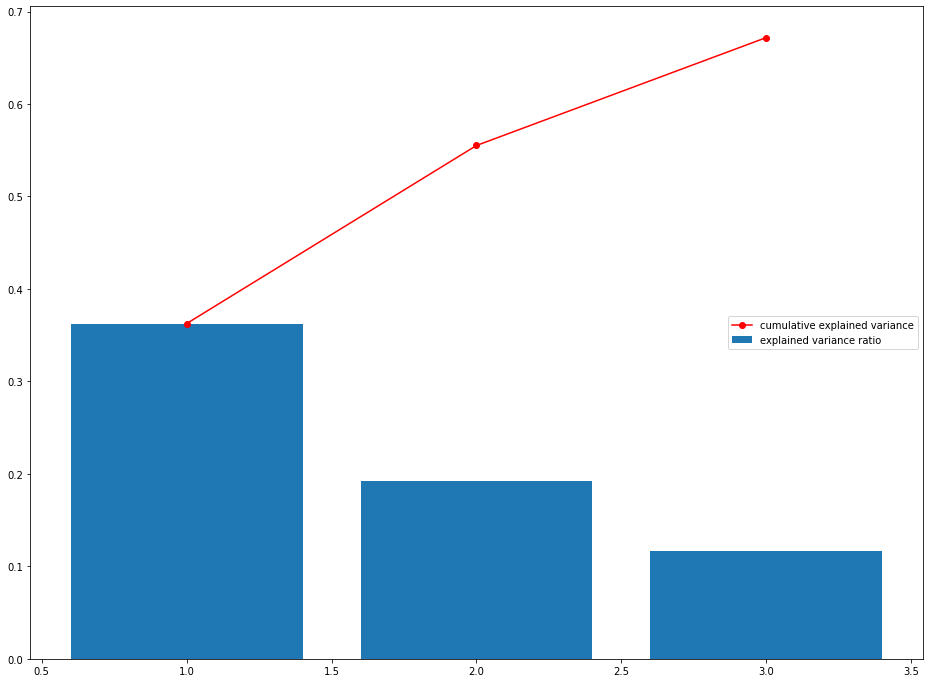

In [45]:
# sam robię w matplotlib bo na github nie widać plotly
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16.0,12.0))
ax = fig.add_subplot(111)
ax.bar(results['component'], results['explained_variance_ratio'],
label='explained variance ratio')
ax.plot(results['component'], results['cumulative'], marker='o', label='cumulative explained variance', c="red")
plt.legend(loc='center right')
plt.show()

In [46]:
X_train_pca_df = pd.DataFrame(data=np.c_[X_train_pca, y_train], columns=['pca1', 'pca2', 'pca3', 'target'])
X_train_pca_df.head()

,pca1,pca2,pca3,target
0,0.763778,2.176559,-1.485799,2.0
1,-2.281878,-1.591492,0.136757,1.0
2,1.214674,2.871460,-4.398794,2.0
3,-2.412145,0.192990,-0.278717,1.0
4,-2.183503,-2.216444,0.735031,1.0


In [47]:
px.scatter_3d(X_train_pca_df, x='pca1', y='pca2', z='pca3', color='target', template='plotly_dark', width=900)

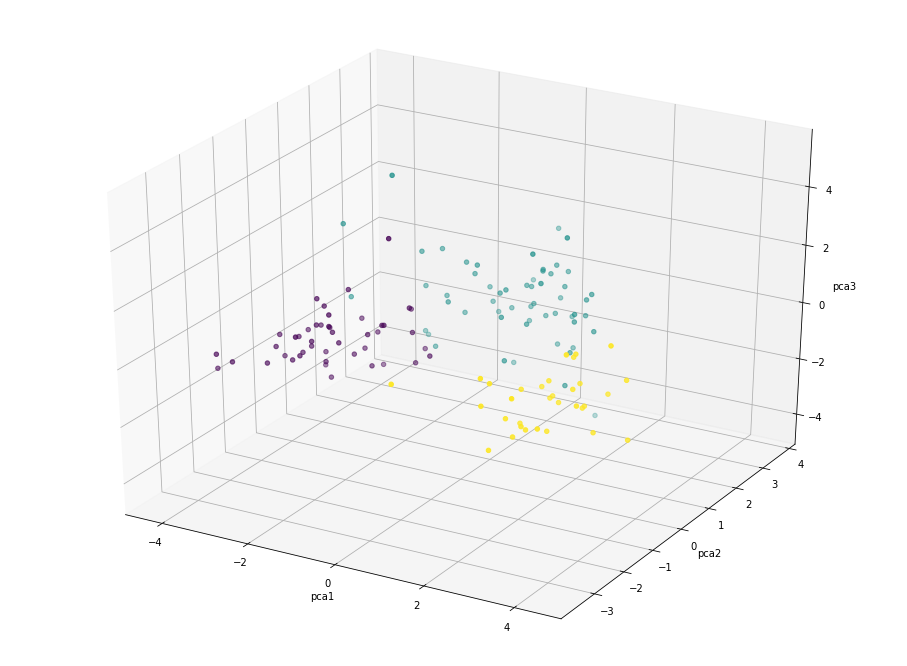

In [48]:
# sam robię w matplotlib bo na github nie widać plotly
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16.0,12.0))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca_df['pca1'], X_train_pca_df['pca2'], X_train_pca_df['pca3'], c=X_train_pca_df['target'])
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.show()

In [49]:
X_train_pca[:5]

array([[ 0.7638,  2.1766, -1.4858],
       [-2.2819, -1.5915,  0.1368],
       [ 1.2147,  2.8715, -4.3988],
       [-2.4121,  0.193 , -0.2787],
       [-2.1835, -2.2164,  0.735 ]])

In [50]:
X_test_pca[:5]

array([[-0.59  ,  2.2811, -1.5019],
       [-0.9671, -0.8685,  1.9122],
       [-1.8225, -0.1171,  0.4258],
       [ 1.7885, -1.653 ,  1.1168],
       [-2.088 ,  1.4095, -0.1451]])